In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler

In [116]:
file=pd.read_csv(r'global_cancer_patients_2015_2024.csv')

In [117]:
file

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [118]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [119]:
file.drop(columns=['Patient_ID'],axis=1,inplace=True)

In [120]:
file.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.421540,2019.480520,5.001698,5.010126,5.010880,4.989826,4.991176,52467.298239,5.006462,4.951207
std,20.224451,2.871485,2.885773,2.888399,2.888769,2.881579,2.894504,27363.229379,2.883335,1.199677
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.225000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76232.720000,7.500000,5.780000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


In [121]:
file['Gender'].value_counts()

Gender
Male      16796
Female    16709
Other     16495
Name: count, dtype: int64

In [122]:
file['Cancer_Type'].value_counts()

Cancer_Type
Colon       6376
Prostate    6308
Leukemia    6266
Liver       6249
Skin        6231
Cervical    6222
Breast      6189
Lung        6159
Name: count, dtype: int64

In [123]:
file['Cancer_Stage'].value_counts()

Cancer_Stage
Stage II     10124
Stage I      10046
Stage III    10008
Stage IV      9933
Stage 0       9889
Name: count, dtype: int64

In [124]:
file['Country_Region'].value_counts()

Country_Region
Australia    5092
UK           5060
USA          5060
India        5040
Germany      5024
Russia       5017
Brazil       5004
Pakistan     4926
China        4913
Canada       4864
Name: count, dtype: int64

In [125]:
encoder=OneHotEncoder(sparse_output=False)
encoded_cancer_type=encoder.fit_transform(file[['Cancer_Type']])
encoded_cancer_type=pd.DataFrame(encoded_cancer_type,columns=encoder.get_feature_names_out(['Cancer_Type']))
file=pd.concat([file,encoded_cancer_type],axis=1)
file.drop(columns=['Cancer_Type'],axis=1,inplace=True)

In [126]:
encoder=OneHotEncoder(sparse_output=False)
encoded_cancer_stage=encoder.fit_transform(file[['Cancer_Stage']])
encoded_cancer_stage=pd.DataFrame(encoded_cancer_stage,columns=encoder.get_feature_names_out(['Cancer_Stage']))
file=pd.concat([file,encoded_cancer_stage],axis=1)
file.drop(columns=['Cancer_Stage'],axis=1,inplace=True)

In [127]:
encoder=OneHotEncoder(sparse_output=False)
encoded_Country_Region=encoder.fit_transform(file[['Country_Region']])
encoded_Country_Region=pd.DataFrame(encoded_Country_Region,columns=encoder.get_feature_names_out(['Country_Region']))
file=pd.concat([file,encoded_Country_Region],axis=1)
file.drop(columns=['Country_Region'],axis=1,inplace=True)

In [128]:
encoder=OneHotEncoder(sparse_output=False)
encoded_Gender=encoder.fit_transform(file[['Gender']])
encoded_Gender=pd.DataFrame(encoded_Gender,columns=encoder.get_feature_names_out(['Gender']))
file=pd.concat([file,encoded_Gender],axis=1)
file.drop(columns=['Gender'],axis=1,inplace=True)

In [129]:
file

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score,...,Country_Region_China,Country_Region_Germany,Country_Region_India,Country_Region_Pakistan,Country_Region_Russia,Country_Region_UK,Country_Region_USA,Gender_Female,Gender_Male,Gender_Other
0,71,2021,6.4,2.8,9.5,0.9,8.7,62913.44,5.9,4.92,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,34,2021,1.3,4.5,3.7,3.9,6.3,12573.41,4.7,4.65,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,80,2023,7.4,7.9,2.4,4.7,0.1,6984.33,7.1,5.84,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,40,2015,1.7,2.9,4.8,3.5,2.7,67446.25,1.6,3.12,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,43,2017,5.1,2.8,2.3,6.7,0.5,77977.12,2.9,3.62,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,80,2023,2.3,7.5,2.8,3.8,2.9,71463.70,1.0,3.63,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
49996,40,2018,6.4,3.5,2.9,9.0,9.8,49619.66,0.4,6.03,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
49997,74,2015,6.2,1.6,8.7,4.7,4.0,5338.25,2.7,6.02,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
49998,21,2018,4.0,6.5,7.6,8.6,8.1,45100.47,7.5,6.54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [130]:
scaler=StandardScaler()
scaler.fit_transform(file)

array([[ 0.8197318 ,  0.52916705,  0.48455517, ..., -0.70845425,
         1.4060225 , -0.70165132],
       [-1.00975518,  0.52916705, -1.28275357, ..., -0.70845425,
         1.4060225 , -0.70165132],
       [ 1.26474215,  1.22567777,  0.83108629, ..., -0.70845425,
         1.4060225 , -0.70165132],
       ...,
       [ 0.96806858, -1.5603651 ,  0.41524894, ..., -0.70845425,
         1.4060225 , -0.70165132],
       [-1.6525479 , -0.51559902, -0.34711953, ..., -0.70845425,
         1.4060225 , -0.70165132],
       [-1.6031023 ,  1.22567777,  0.0340647 , ..., -0.70845425,
         1.4060225 , -0.70165132]], shape=(50000, 36))

In [131]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       50000 non-null  int64  
 1   Year                      50000 non-null  int64  
 2   Genetic_Risk              50000 non-null  float64
 3   Air_Pollution             50000 non-null  float64
 4   Alcohol_Use               50000 non-null  float64
 5   Smoking                   50000 non-null  float64
 6   Obesity_Level             50000 non-null  float64
 7   Treatment_Cost_USD        50000 non-null  float64
 8   Survival_Years            50000 non-null  float64
 9   Target_Severity_Score     50000 non-null  float64
 10  Cancer_Type_Breast        50000 non-null  float64
 11  Cancer_Type_Cervical      50000 non-null  float64
 12  Cancer_Type_Colon         50000 non-null  float64
 13  Cancer_Type_Leukemia      50000 non-null  float64
 14  Cancer

C:\Users\User.DESKTOP-OQ6NE4T\AppData\Local\Temp\ipykernel_12108\2577261594.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')


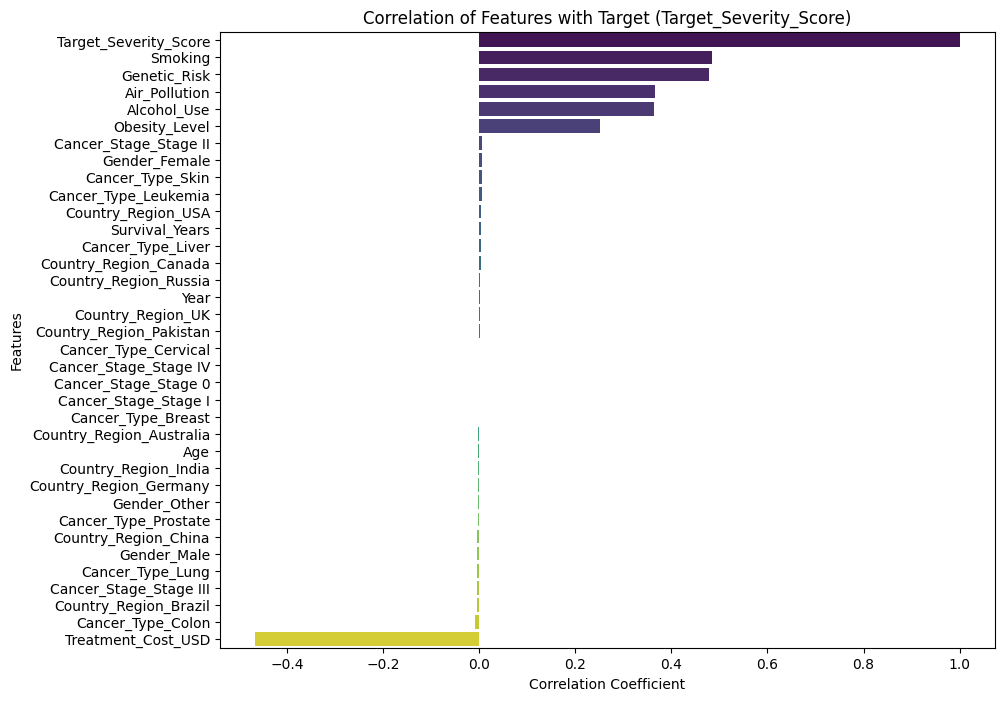

In [132]:
# إضافة العمود الهدف وتحليل علاقته ببقية الفيتشرز
plt.figure(figsize=(10, 8))
correlation_with_target = file.corr()['Target_Severity_Score'].sort_values(ascending=False)

sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='viridis')
plt.title('Correlation of Features with Target (Target_Severity_Score)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


In [133]:
arr1 = ['Age','Gender_Male','Gender_Female','Gender_Other', 'Year', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking','Obesity_Level', 'Treatment_Cost_USD', 'Survival_Years', 'Target_Severity_Score'] 

arr2=['Cancer_Type_Breast', 'Cancer_Type_Cervical', 'Cancer_Type_Colon', 'Cancer_Type_Leukemia', 
    'Cancer_Type_Liver', 'Cancer_Type_Lung', 'Cancer_Type_Prostate', 'Cancer_Type_Skin', 
    'Cancer_Stage_Stage 0', 'Cancer_Stage_Stage I', 'Cancer_Stage_Stage II', 'Cancer_Stage_Stage III', 
    'Cancer_Stage_Stage IV', 'Country_Region_Africa', 'Country_Region_Asia', 'Country_Region_Europe', 
    'Country_Region_Latin_America', 'Country_Region_Middle_East', 'Country_Region_Oceania', 
    'Country_Region_UK', 'Country_Region_USA'
]
arr2 = [col for col in arr2 if col in file.columns]

features_1=['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking','Obesity_Level', 'Treatment_Cost_USD','Target_Severity_Score','Cancer_Type_Skin','Cancer_Type_Leukemia','Cancer_Type_Colon']

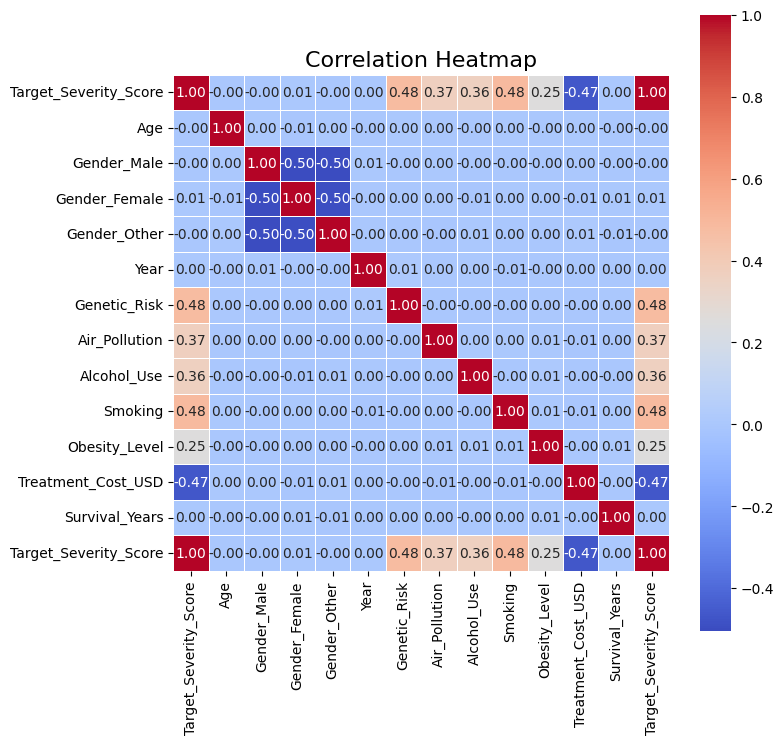

In [134]:
plt.figure(figsize=(8, 8)) 
correlation = file[['Target_Severity_Score'] + arr1].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()


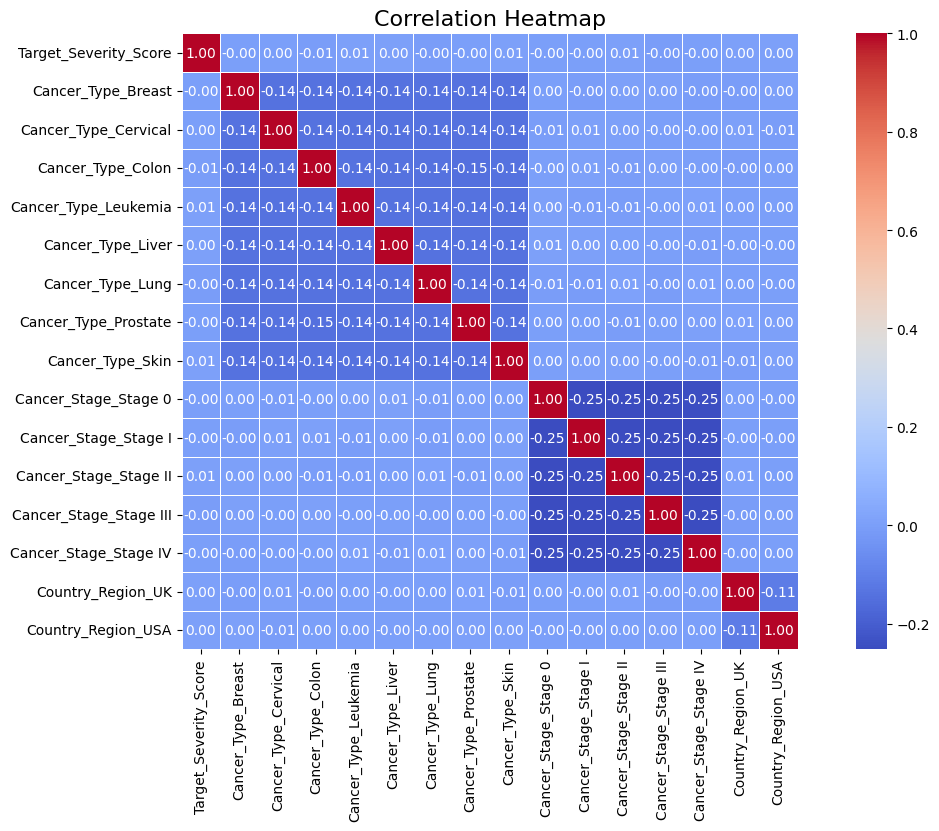

In [135]:
plt.figure(figsize=(15, 8)) 
correlation_2 = file[['Target_Severity_Score'] + arr2].corr()

sns.heatmap(correlation_2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [136]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       50000 non-null  int64  
 1   Year                      50000 non-null  int64  
 2   Genetic_Risk              50000 non-null  float64
 3   Air_Pollution             50000 non-null  float64
 4   Alcohol_Use               50000 non-null  float64
 5   Smoking                   50000 non-null  float64
 6   Obesity_Level             50000 non-null  float64
 7   Treatment_Cost_USD        50000 non-null  float64
 8   Survival_Years            50000 non-null  float64
 9   Target_Severity_Score     50000 non-null  float64
 10  Cancer_Type_Breast        50000 non-null  float64
 11  Cancer_Type_Cervical      50000 non-null  float64
 12  Cancer_Type_Colon         50000 non-null  float64
 13  Cancer_Type_Leukemia      50000 non-null  float64
 14  Cancer

In [137]:
features_1=file[['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking','Obesity_Level', 'Treatment_Cost_USD','Target_Severity_Score','Cancer_Type_Skin','Cancer_Type_Leukemia','Cancer_Type_Colon']]

In [138]:
scaler=MinMaxScaler()
scaled_data = scaler.fit_transform(file)
file= pd.DataFrame(scaled_data, columns=file.columns)


In [139]:
file

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score,...,Country_Region_China,Country_Region_Germany,Country_Region_India,Country_Region_Pakistan,Country_Region_Russia,Country_Region_UK,Country_Region_USA,Gender_Female,Gender_Male,Gender_Other
0,0.739130,0.666667,0.64,0.28,0.95,0.09,0.87,0.609616,0.59,0.486683,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.202899,0.666667,0.13,0.45,0.37,0.39,0.63,0.079720,0.47,0.453995,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.869565,0.888889,0.74,0.79,0.24,0.47,0.01,0.020887,0.71,0.598063,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.289855,0.000000,0.17,0.29,0.48,0.35,0.27,0.657330,0.16,0.268765,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.333333,0.222222,0.51,0.28,0.23,0.67,0.05,0.768181,0.29,0.329298,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.869565,0.888889,0.23,0.75,0.28,0.38,0.29,0.699619,0.10,0.330508,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
49996,0.289855,0.333333,0.64,0.35,0.29,0.90,0.98,0.469681,0.04,0.621065,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
49997,0.782609,0.000000,0.62,0.16,0.87,0.47,0.40,0.003560,0.27,0.619855,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
49998,0.014493,0.333333,0.40,0.65,0.76,0.86,0.81,0.422111,0.75,0.682809,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [140]:
label=file['Target_Severity_Score']
features=file.drop(labels=['Target_Severity_Score'],axis=1,inplace=True)

In [141]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,label,test_size=.3,random_state=42)

TypeError: Expected sequence or array-like, got <class 'NoneType'>